<a href="https://colab.research.google.com/github/SunnyKrS1ngh/deepLearning_NeuralNetworks/blob/main/DeepLearning201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torchvision

In [ ]:
#torch is like numpy used for handling data
import torch
#torchvision contains datasets
import torchvision
from torchvision import transforms,datasets

In [ ]:
x = torch.Tensor([5,3])
y = torch.Tensor([0,5])
#tensors like multidimensinal arrays

print(x*y)

tensor([ 0., 15.])


In [ ]:
x = torch.rand([2,5])
print(x)

tensor([[0.0298, 0.8390, 0.9132, 0.5700, 0.5600],
        [0.8897, 0.8323, 0.2539, 0.2638, 0.2294]])


In [ ]:
x.view([1,10])
#view kind of flattens the data

tensor([[0.0298, 0.8390, 0.9132, 0.5700, 0.5600, 0.8897, 0.8323, 0.2539, 0.2638,
         0.2294]])

In [ ]:
train = datasets.MNIST("",train = True,download = True, transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("",train = False,download = True, transform = transforms.Compose([transforms.ToTensor()]))

#The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. (It cotains collection of handwritten pixel numbers)

100%|██████████| 9912422/9912422 [00:00<00:00, 105024177.87it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 67297607.68it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27305427.60it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10999150.56it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle= True)
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle= True)

In [ ]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x,y = data[0][0], data[1][0]
#data[0] refers to image and data[1] refers to tensor

In [ ]:
import matplotlib.pyplot as plt

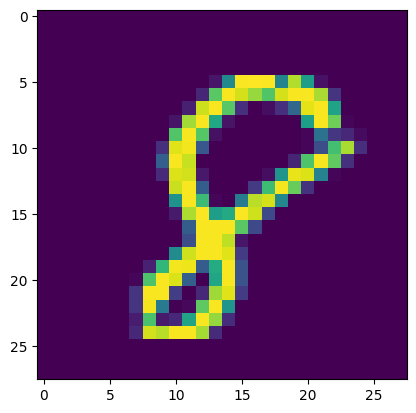

In [ ]:
plt.imshow(data[0][5].view(28,28))
plt.show()
#use matplotlib to visualize the data

In [ ]:
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
  xs, ys = data
  for y in ys:
    counter_dict[int(y)]+=1
    total+=1

for i in counter_dict:
  counter_dict[i] = (counter_dict[i]/total)*100

print(counter_dict)

{0: 9.871666666666666, 1: 11.236666666666666, 2: 9.93, 3: 10.218333333333334, 4: 9.736666666666666, 5: 9.035, 6: 9.863333333333333, 7: 10.441666666666666, 8: 9.751666666666667, 9: 9.915000000000001}


In [ ]:
import torch.nn as nn
import torch.nn.functional as f

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28,64)
    self.fc2 = nn.Linear(64,64)
    self.fc3 = nn.Linear(64,64)
    self.fc4 = nn.Linear(64,10)

  def forward(self,x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = f.relu(self.fc3(x))
    x = self.fc4(x)
    return f.log_softmax(x,dim=1)

net = Net()
print(net)

#creating fully connected linear layers




Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X = torch.rand((28,28))
X = X.view(-1,28*28)
#-1 means any size
output = net(X)
output
#these 10 -ve values below indicate the probabilities of 0-9 digits

tensor([[-2.4103, -2.3488, -2.2586, -2.2469, -2.2395, -2.4480, -2.3050, -2.2495,
         -2.2807, -2.2625]], grad_fn=<LogSoftmaxBackward0>)

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr = 0.001)

EPOCHS =3
#epochs means no of full passes

for epochs in range(EPOCHS):
  for data in trainset:
    x,y = data
    net.zero_grad()
    #we need to reset the gradient after each dataset to avoid its increment
    output = net(x.view(-1,28*28))
    loss = f.nll_loss(output,y)
    loss.backward()
    #backward propagation do adjust the weights on basis of output
    optimizer.step()
    #updating the steps on basis of outputs
  print(loss)

tensor(0.0486, grad_fn=<NllLossBackward0>)
tensor(7.5254e-05, grad_fn=<NllLossBackward0>)
tensor(0.1285, grad_fn=<NllLossBackward0>)


In [ ]:
correct = 0
total =0
#here we are trying to calculate the accuracy of the model so we are just passing data without gradient descent
with torch.no_grad():
  for data in trainset:
    x,y = data
    output = net(x.view(-1,28*28))
    for idx,i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct+=1
      total+=1

print("Accuracy = ",round(correct/total,3))
#very high accuracy of 0.98+ may mean a red flag in case of real life situations

Accuracy =  0.994


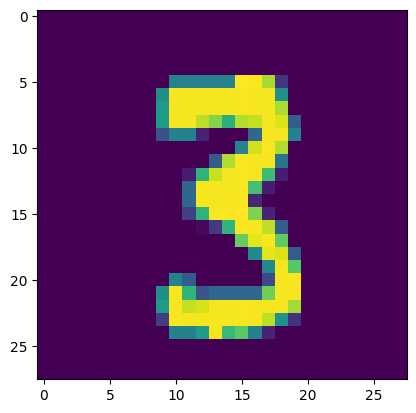

In [ ]:
plt.imshow(x[4].view(28,28))
plt.show()


In [ ]:
print(torch.argmax(net(x[4].view(-1,28*28))[0]))

tensor(3)
